# Fuel Efficiency Analysis

## Regression Tree (Student)

In [1]:
# load the rpart library
library(rpart)

In [2]:
# make a function to split the data into a training set and a validation set
test_train_split = function(data, test_size=.25){
    
    # the the number of observations in the data
    n_obs = dim(data)[1]
    
    # find the number of training observations by rounding up
    n_train_obs = ceiling(n_obs * (1 - test_size))
    
    # get the train indexes
    train_idx = sample(n_obs, n_train_obs)
    
    # split the data
    train = data[train_idx, ]
    test = data[-train_idx, ]

    # return the result
    result = list(train, test)
    return(result)
}

In [3]:
# write a function to calculate the MSE
calc_MSE = function (model, data){
    return (
        mean(
            (data$mpg - predict(model, data)) ^ 2
        )
    )
}

In [4]:
# read in the cleaned ISLR Auto dataset cleaned in 10-ins_best_subset
auto = read.csv("../resources/ISLR_auto_clean.csv", row.names=1)

In [5]:
# split the data
set.seed(1)
result = test_train_split(auto)
train = data.frame(result[1])
test = data.frame(result[2])

In [6]:
# train a decsion tree and show results
tree_unpruned = rpart(mpg ~ ., data=train)
summary(tree_unpruned)

Call:
rpart(formula = mpg ~ ., data = train)
  n= 293 

          CP nsplit rel error    xerror       xstd
1 0.57351287      0 1.0000000 1.0060150 0.07124512
2 0.08029049      1 0.4264871 0.4696977 0.04757140
3 0.07487784      2 0.3461966 0.3978293 0.04679789
4 0.03991728      3 0.2713188 0.3388283 0.04084489
5 0.03803095      4 0.2314015 0.3053024 0.03860829
6 0.03556366      5 0.1933706 0.2969482 0.03837991
7 0.01000000      6 0.1578069 0.2492844 0.03175647

Variable importance
      weight displacement    cylinders   horsepower       origin acceleration 
          23           20           19           17           10            7 
        year 
           5 

Node number 1: 293 observations,    complexity param=0.5735129
  mean=23.32662, MSE=56.28284 
  left son=2 (152 obs) right son=3 (141 obs)
  Primary splits:
      weight       < 2772   to the right, improve=0.5735129, (0 missing)
      displacement < 190.5  to the right, improve=0.5713442, (0 missing)
      cylinders    < 4.5 

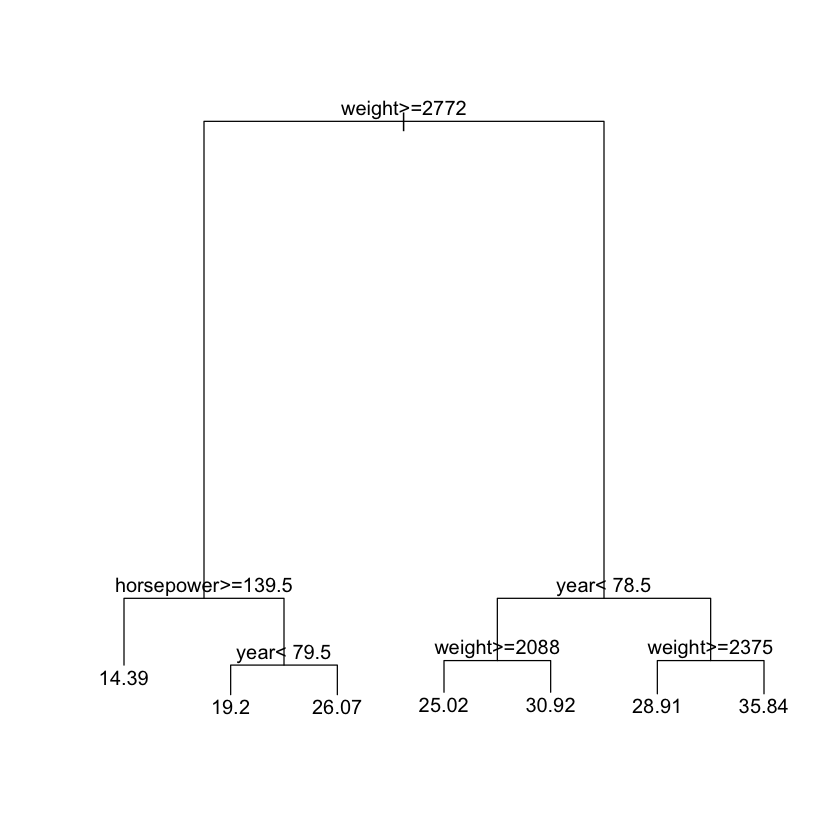

In [7]:
# plot the unpruned tree
plot(tree_unpruned)
text(tree_unpruned)

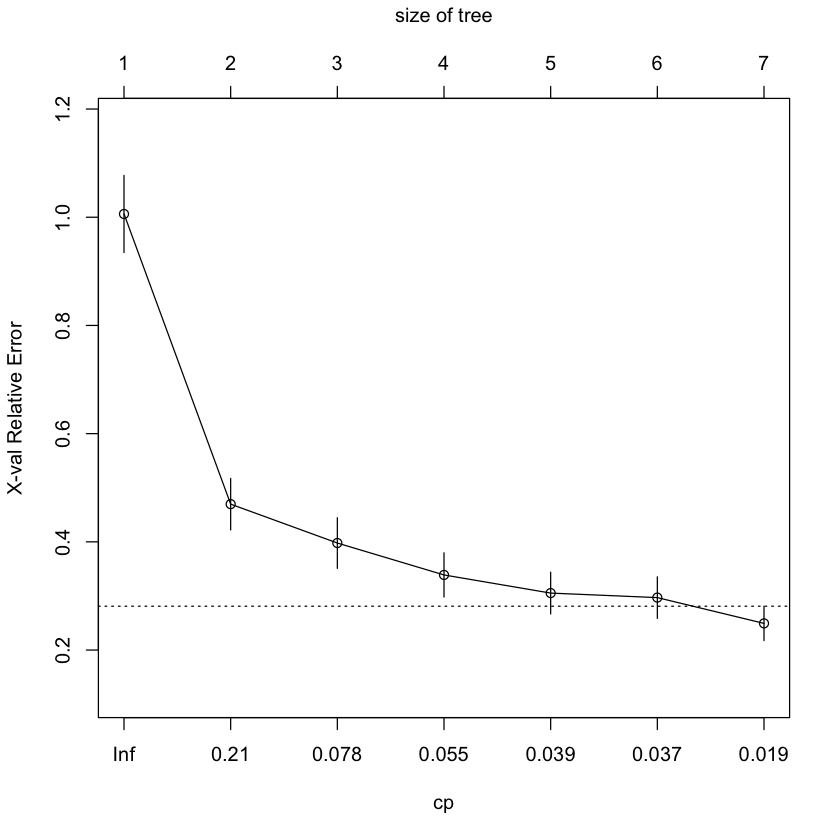

In [8]:
# show a plot of complexity parameter (penalty) versus relative error
plotcp(tree_unpruned)

In [9]:
# prune the tree at the 5th node and show the summary
tree_pruned = prune(tree_unpruned, cp=.039)
summary(tree_pruned)

Call:
rpart(formula = mpg ~ ., data = train)
  n= 293 

          CP nsplit rel error    xerror       xstd
1 0.57351287      0 1.0000000 1.0060150 0.07124512
2 0.08029049      1 0.4264871 0.4696977 0.04757140
3 0.07487784      2 0.3461966 0.3978293 0.04679789
4 0.03991728      3 0.2713188 0.3388283 0.04084489
5 0.03900000      4 0.2314015 0.3053024 0.03860829

Variable importance
      weight displacement    cylinders   horsepower       origin acceleration 
          23           20           19           17           10            7 
        year 
           4 

Node number 1: 293 observations,    complexity param=0.5735129
  mean=23.32662, MSE=56.28284 
  left son=2 (152 obs) right son=3 (141 obs)
  Primary splits:
      weight       < 2772   to the right, improve=0.5735129, (0 missing)
      displacement < 190.5  to the right, improve=0.5713442, (0 missing)
      cylinders    < 4.5    to the right, improve=0.5633728, (0 missing)
      horsepower   < 97.5   to the right, improve=0.49

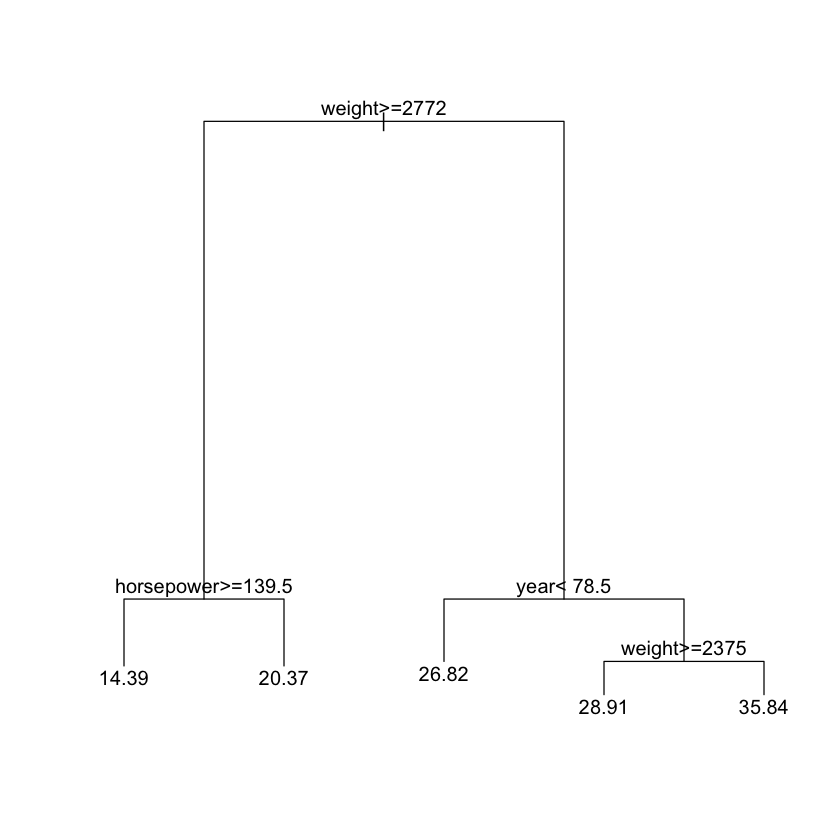

In [10]:
# plot the pruned tree
plot(tree_pruned)
text(tree_pruned)

In [11]:
# find the test mse for the unpruned tree
calc_MSE(tree_unpruned, test)

[1] 12.04819

In [12]:
# find the test mse for the pruned tree
calc_MSE(tree_pruned, test)

[1] 20.81707